# Ping Pong King of the Hill Game Statistics Summary
*Author: Gaston Wolfart*

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta

## 1. Processing details

### 1.1 Loading data for one game

In [2]:
dummy_data = [
    ('Marc', 120),
    ('Mathieu', 20),
    ('Marc', 32),
    ('Gaston', 48),
    ('Mathieu', 70),
    ('Gaston', 29),
    ('Mathieu', 10),
    ('Marc', 25),
]
dummy_df = pd.DataFrame(dummy_data, columns=['Name', 'Interval'])
dummy_df

,Name,Interval
0,Marc,120
1,Mathieu,20
2,Marc,32
3,Gaston,48
4,Mathieu,70
5,Gaston,29
6,Mathieu,10
7,Marc,25


Game duration

In [3]:
total_duration_seconds = dummy_df['Interval'].sum()
print('Game lasted for %s (%d sec.)' % (str(timedelta(seconds=int(total_duration_seconds))), total_duration_seconds))

Game lasted for 0:05:54 (354 sec.)


Players names

In [4]:
player_names = dummy_df['Name'].unique()
print(player_names)

['Marc' 'Mathieu' 'Gaston']


Assign a color to each player for better plotting.

In [5]:
# determine consistent color palette for players
player_colors = {name:color for name, color in zip(player_names, sns.color_palette('Pastel1')[:len(player_names)])}

### 1.2 First and last king

In [6]:
print('First king: %s ' % dummy_df.iloc[0]['Name'])
print('Last king: %s ' % dummy_df.iloc[-1]['Name'])

First king: Marc 
Last king: Marc 


### 1.3 Number of crowns claimed

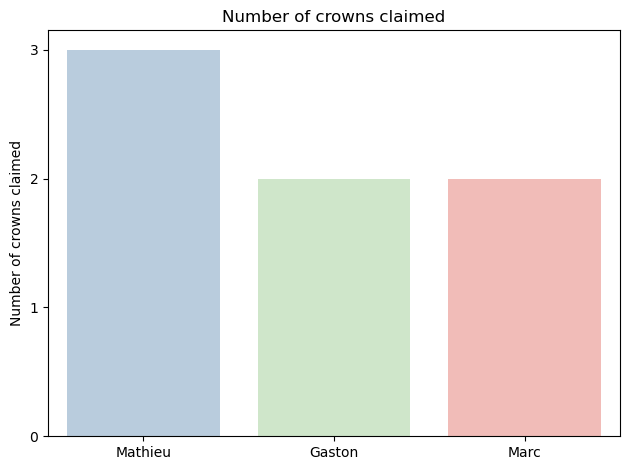

In [7]:
# number of times that a player claimed the crown

# need to remove first entry because crown was not claimed
crowns_claimed = dummy_df.drop(index=0).groupby('Name').count().rename({'Interval': 'Claimed'}, axis=1).sort_values('Claimed', ascending=False)


# plotting
sns.barplot(x=crowns_claimed.index, y=crowns_claimed.Claimed, palette=player_colors)

plt.xlabel('')
plt.yticks(range(0, int(np.ceil(crowns_claimed['Claimed'].max())) + 1))
plt.ylabel('Number of crowns claimed')
plt.title('Number of crowns claimed')
plt.tight_layout()
plt.show()

### 1.4 Total time as king

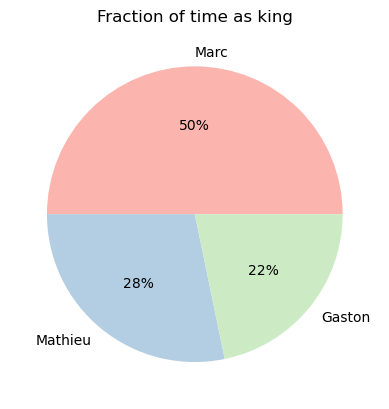

In [8]:
total_time_king = dummy_df.groupby('Name').sum().rename({'Interval': 'Duration'}, axis=1).sort_values('Duration', ascending=False)

# plotting
plt.pie(total_time_king['Duration'], labels=total_time_king.index, autopct='%.0f%%', colors=[player_colors[key] for key in player_colors])
plt.title('Fraction of time as king')
plt.show()

### 1.5 Mean reign duration

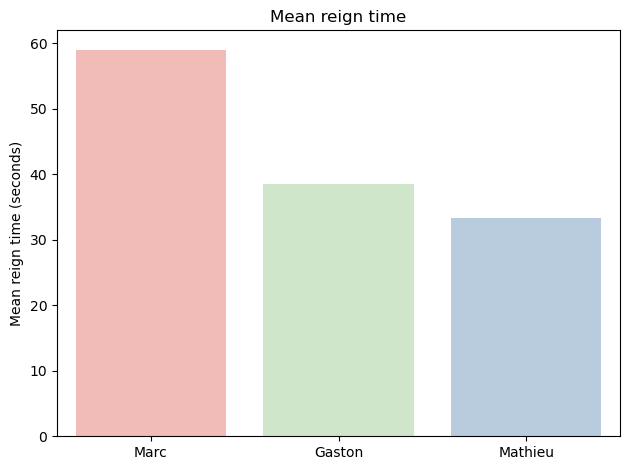

In [9]:
mean_reign_time = dummy_df.groupby('Name').mean().rename({'Interval': 'Duration'}, axis=1).sort_values('Duration', ascending=False)

# plotting
sns.barplot(x=mean_reign_time.index, y=mean_reign_time.Duration, palette=player_colors)

plt.xlabel('')
plt.ylabel('Mean reign time (seconds)')
plt.title('Mean reign time')
plt.tight_layout()
plt.show()


### 1.6 (experimental) Transition graph

Goal is to have something like this
```
Gaston        x-------------x
              |             |
Marc    ------x             |               x------>
                            |               |
Mathieu                     x---------------x
```

One possible way:
1. Encode each name by int value
2. Transform time interval to percentage of game time.
3. Create vector of length 100 with encoding values of player.

In [10]:
player_codes = { name:code for name, code in zip(player_names, range(len(player_names)))}
player_codes

{'Marc': 0, 'Mathieu': 1, 'Gaston': 2}

In [11]:
dummy_df['interval_perc'] = dummy_df['Interval'].apply(lambda x: int(x/total_duration_seconds * 100))
dummy_df

,Name,Interval,interval_perc
0,Marc,120,33
1,Mathieu,20,5
2,Marc,32,9
3,Gaston,48,13
4,Mathieu,70,19
5,Gaston,29,8
6,Mathieu,10,2
7,Marc,25,7


In [31]:
graph_vector = []

for _, transition in dummy_df.iterrows():
    graph_vector.extend(transition.Name for i in range(transition.interval_perc))



96

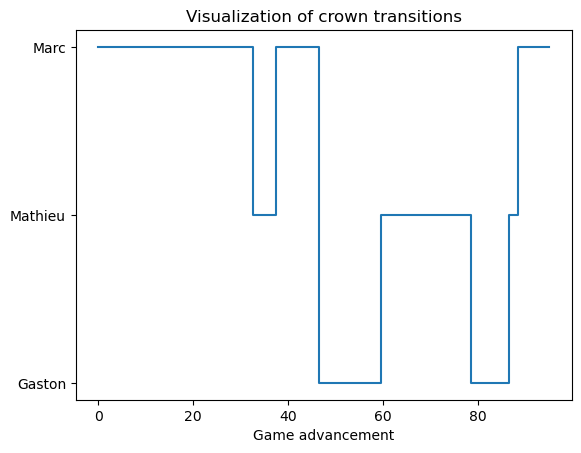

In [35]:
sns.lineplot(x=range(len(graph_vector)), y=graph_vector, drawstyle='steps-mid')
plt.xlabel('Game advancement')
plt.title('Visualization of crown transitions')
plt.show()

### Summary

Game duration: 0:05:54 
First king: Marc | Last king: Marc 


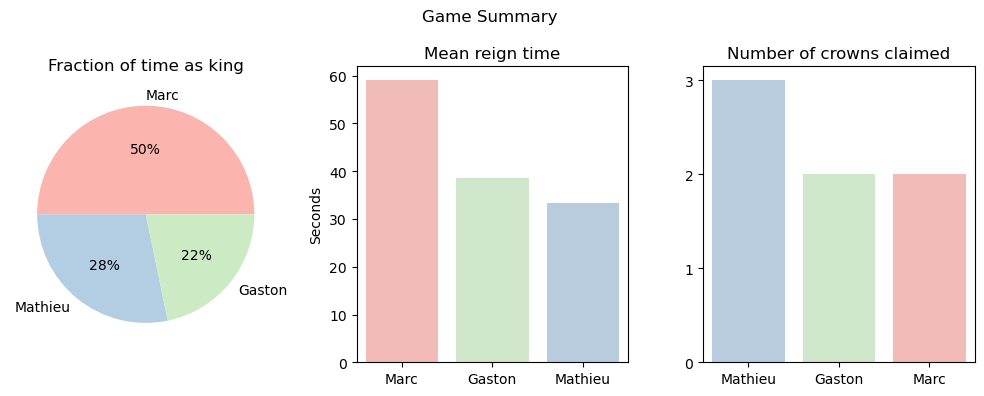

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

print('Game duration: %s ' % str(timedelta(seconds=int(total_duration_seconds))))
print('First king: %s | Last king: %s ' % (dummy_df.iloc[0]['Name'], dummy_df.iloc[-1]['Name']))

fig.suptitle('Game Summary')

# Total time as king
axs[0].pie(total_time_king['Duration'], labels=total_time_king.index, autopct='%.0f%%', colors=[player_colors[key] for key in player_colors])
axs[0].set_title('Fraction of time as king')

# Mean reign duration
sns.barplot(x=mean_reign_time.index, y=mean_reign_time.Duration, palette=player_colors, ax=axs[1])

axs[1].set_xlabel('')
axs[1].set_ylabel('Seconds')
axs[1].set_title('Mean reign time')

# Crowns claimed
sns.barplot(x=crowns_claimed.index, y=crowns_claimed.Claimed, palette=player_colors, ax=axs[2])

axs[2].set_yticks(range(0, int(np.ceil(crowns_claimed['Claimed'].max())) + 1))
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].set_title('Number of crowns claimed')


plt.tight_layout()
plt.show()